Zadanie 1

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def z1(x):
    return (6-2*x)/(6+4*x+x**2)

def z2(x):
    return (6-4*x+x**2)/(6+2*x)

x = np.arange(-2,3,0.01)
y1 = z1(x)
y2 = z2(x)
y = np.exp(-x)

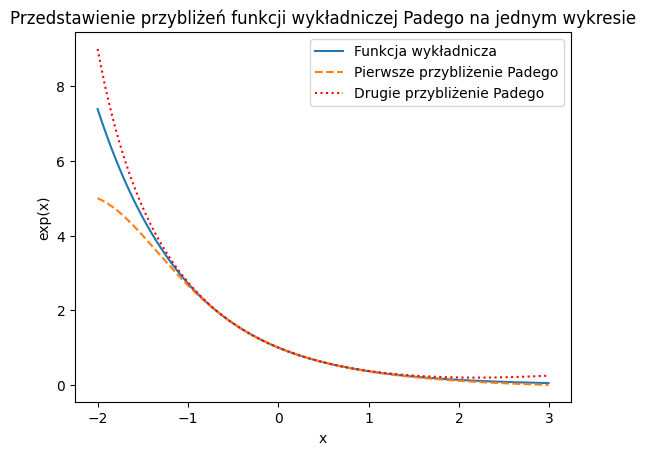

In [30]:
plt.plot(x,y, label="Funkcja wykładnicza")
plt.plot(x,y1, label="Pierwsze przybliżenie Padego",ls="--")
plt.plot(x,y2, label="Drugie przybliżenie Padego", ls = ":", color = 'red')
plt.xlabel("x")
plt.ylabel("exp(x)")
plt.title("Przedstawienie przybliżeń funkcji wykładniczej Padego na jednym wykresie")
plt.legend()
plt.savefig("Wykres 2 na 1.png")


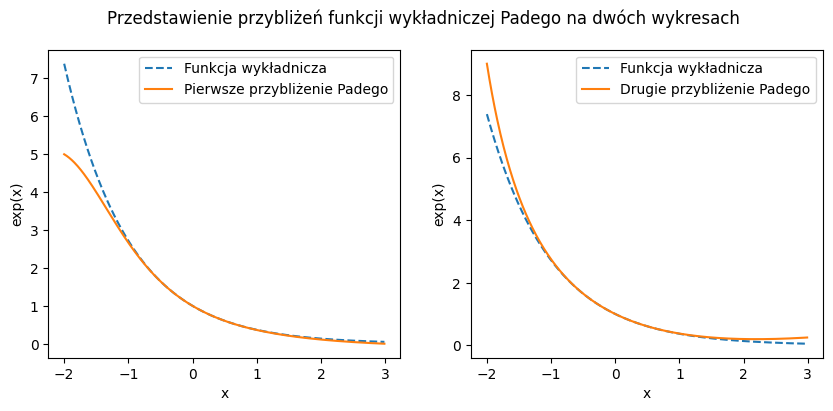

In [29]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.suptitle("Przedstawienie przybliżeń funkcji wykładniczej Padego na dwóch wykresach")
plt.plot(x,y, label="Funkcja wykładnicza", ls = '--')
plt.plot(x,y1, label="Pierwsze przybliżenie Padego")
plt.xlabel("x")
plt.ylabel("exp(x)")
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,y, label="Funkcja wykładnicza", ls = '--')
plt.plot(x,y2, label="Drugie przybliżenie Padego")
plt.xlabel("x")
plt.ylabel("exp(x)")
plt.legend()
plt.savefig("Wykres 2 na 2.png")

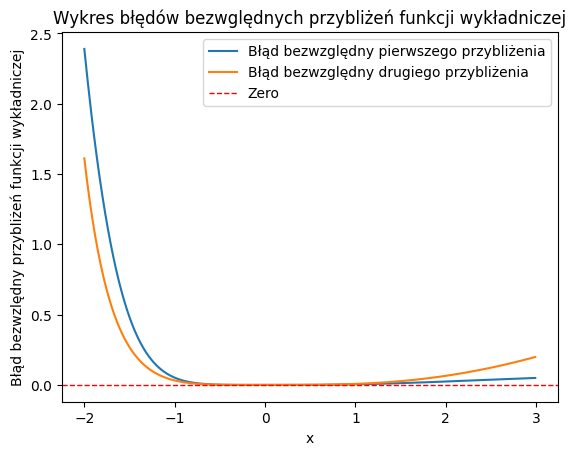

In [28]:
#błędy

b1 = np.abs(y1-y)
b2 = np.abs(y2-y)
plt.title("Wykres błędów bezwględnych przybliżeń funkcji wykładniczej")
plt.plot(x,b1,label="Błąd bezwzględny pierwszego przybliżenia")
plt.plot(x,b2,label="Błąd bezwzględny drugiego przybliżenia")
plt.axhline(0, color = 'red', ls = '--', label="Zero", linewidth='1')
plt.xlabel("x")
plt.ylabel("Błąd bezwzlędny przybliżeń funkcji wykładniczej")
plt.legend()
plt.savefig("Bledy.png")

Zadanie 2

In [17]:
def jednostkaMaszynowa():
    """
    funkcja znajdująca jednostkę maszynową poprzez prostą pętlę while

    Input:
    brak

    Output:
    epsilon [float] - jednostka maszynowa, poniżej tej wartości komputer nie widzi precyzji operacji.
    """
    epsilon = 0.1
    while 1+epsilon != 1:
        epsilon = epsilon/(1.01+epsilon)
    return epsilon

eps = jednostkaMaszynowa()
print(eps)

1.1060728566224522e-16


Zadanie 3

Błędy w tym zadaniu wynikają z niemożliwości reprezentacji niektórych liczb zmiennoprzecinkowych z odpowiednią dokładnością. Niedokładności są większe niż jednostka maszynowa, więc wyrzuca błąd.

In [24]:
print(7/100*100-7)
print(7/100*100-7 == 0)

8.881784197001252e-16
False


In [35]:
for i in range(1,51):
    if i/100*100-i!=0:
        print(i, i/100*100-i, np.abs(i/100*100-i) > eps)

7 8.881784197001252e-16 True
14 1.7763568394002505e-15 True
28 3.552713678800501e-15 True
29 -3.552713678800501e-15 True


Zadanie 4

Reprezentacja liczby w IEEE 754:
(-1)^ZNAK * 2^(E-127)*(1+MANTYSA)

In [15]:
liczba = 1.7

znak = 0
wykladnik = "0b01111111"
mantysa ="10110011001100110011001"
lMantysa = 0
for i in range(len(mantysa)):
    lMantysa += int(mantysa[i],10)*(2**-(i+1))

przyb = ((-1)**znak)*(2**(int(wykladnik,2)-127))*(1+lMantysa)

bladBezwzgledny = np.abs(przyb-liczba)
bladWzgledny = bladBezwzgledny/liczba

print(bladBezwzgledny, bladWzgledny)

7.152557368605983e-08 4.2073866874152845e-08


ZADANIE 5 i 6

In [18]:
import cProfile

In [23]:
def wielomian():
    X = np.arange(-10,10.0001,0.0001)
    return 6*X**4+5*X**3-13*X**2+X+1

def kiepskiWielomian():
    X = np.arange(-10,10.0001,0.0001)
    Y = [6*x**4+5*x**3-13*x**2+x+1 for x in X]
    return Y

def kiepsciejszyWielomian():
    X = np.arange(-10,10.0001,0.0001)
    Y = []
    for x in X:
        Y.append(6*x**4+5*x**3-13*x**2+x+1)

def wielomianHornera():
    X = np.arange(-10,10.0001,0.0001)
    return 1+X*(1+X*(-13+X*(5+X*6)))


53688.776134369764 63710.999998823485 53688.776134369764 63710.99999882348


TESTY 4 metod

In [24]:
cProfile.run('wielomian()')

         5 function calls in 0.045 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.043    0.043    0.044    0.044 3134130620.py:1(wielomian)
        1    0.001    0.001    0.045    0.045 <string>:1(<module>)
        1    0.000    0.000    0.045    0.045 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [25]:
cProfile.run('kiepskiWielomian()')

         6 function calls in 0.523 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.519    0.519 3134130620.py:5(kiepskiWielomian)
        1    0.518    0.518    0.518    0.518 3134130620.py:7(<listcomp>)
        1    0.004    0.004    0.523    0.523 <string>:1(<module>)
        1    0.000    0.000    0.523    0.523 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [26]:
cProfile.run('kiepsciejszyWielomian()')

         200006 function calls in 0.619 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.532    0.532    0.614    0.614 3134130620.py:10(kiepsciejszyWielomian)
        1    0.005    0.005    0.619    0.619 <string>:1(<module>)
        1    0.000    0.000    0.619    0.619 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
   200001    0.081    0.000    0.081    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [27]:
cProfile.run('wielomianHornera()')

         5 function calls in 0.012 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.011    0.011 3134130620.py:16(wielomianHornera)
        1    0.000    0.000    0.011    0.011 <string>:1(<module>)
        1    0.000    0.000    0.012    0.012 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




Metoda Hornera dominuje z powodu braku potegowania.